# Chargement des librairies

In [355]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 

# Creation d'un dataSet (x, y) fictif

In [287]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 5) 


# Visualisation du dataSet

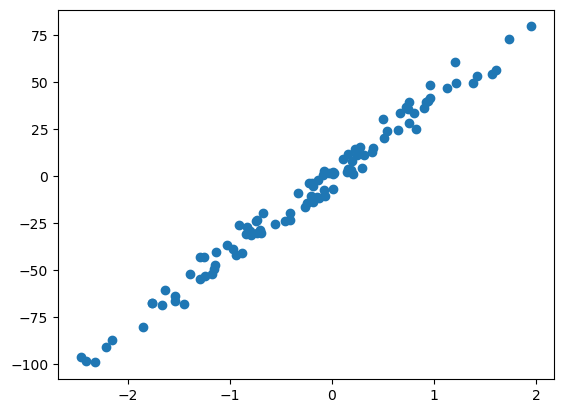

In [290]:
plt.scatter(x, y) #

# Visualisation de dimensions de nos matrices

In [292]:
print(x.shape)
y = y.reshape(y.shape[0], 1) #On a du reshape (y) car elles n'étaient pas bonnes.
print(y.shape)

(100, 1)
(100, 1)


# Création de la matrice X + dimensions matrices + theta initialisé avec paramètres aléatoires

In [294]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))#Permet de coller ensemble 2 vecteurs Numpy l'un à coté de l'autre
X
'''Initialisation du vecteur theta, on ne le connait pas, il caractérise les propriétés de notre modèle, et c'est à la machine de trouver le Vecteur theta
#qui nous donne l'erreur la plus petite, donc qui minimise la fonction coût. On va donc initailiser theta avec des parametres aléatoires.'''
theta = np.random.randn(2, 1) #Permet de générer des nombres aléatoires
theta.shape

(2, 1)

# A quoi ressemble le vecteur theta

In [296]:
theta

array([[ 0.45047349],
       [-1.06893052]])

# Creation d'une fonction model + retournement produit matriciel X.dot(theta)

In [298]:
def model (X, theta):
    return X.dot(theta)

# Visualisation de notre dataSet ainsi que de notre modèle

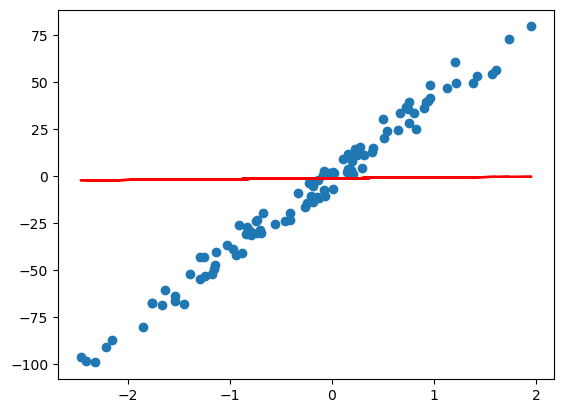

In [300]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c = 'red')

#### Modèle qui ne rentre pas dans le nuage de point

# Fonction coût

In [304]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum(model(X, theta)- y)**2

# Test de la fonction cost_function

In [306]:
cost_function(X, y, theta)

3266.299178351858

# Calcul du gradient

In [380]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# Calcul algorithme de la descente de Gradient

#### definition gradient_descent, avec X, Y et theta dans cette fonction ainsi que de l'hyperparamètre alpha (learning rate), ainsi que nbr d'itérations et le cost_history

In [383]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history  = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate*grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

# Entrainement du modèle

In [312]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.01, n_iteration = 2000)

# Taille matrices

In [314]:
X.shape

(100, 2)

In [316]:
y.shape

(100, 1)

In [318]:
theta.shape

(2, 1)

# Vecteur theta_final

In [320]:
theta_final

array([[40.50839991],
       [ 0.37183507]])

# Création vecteur prédiction par rapport à notre modèle pour voir la véracité de ses résultats

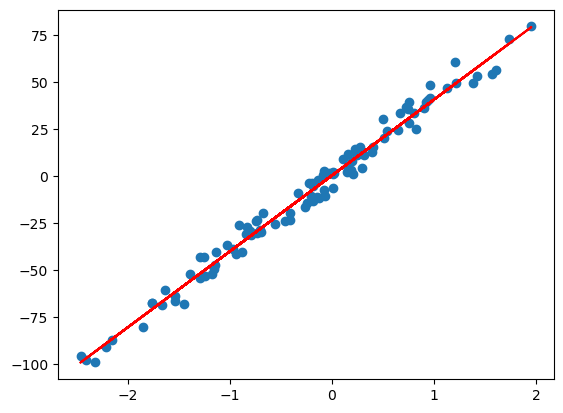

In [322]:
prediction = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, prediction, c ='r')

# Permet de visualiser à quel moment notre modèle a atteint sa function_cost la plus basse

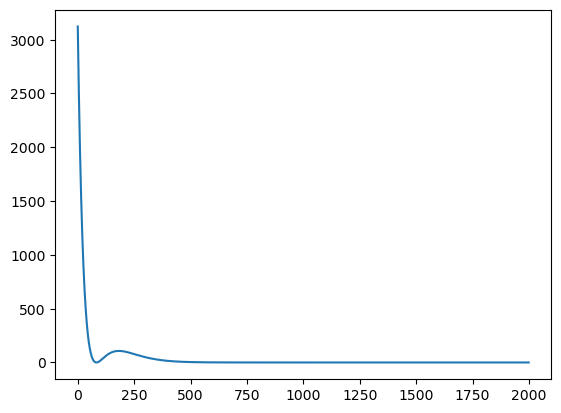

In [394]:
plt.plot(range(2000), cost_history)

# Def le coef determinateur afin de voir son pourcentage de prédiction

In [332]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

# Affiche le coef determinateur

In [344]:
res = coef_determination(y, prediction)
res

0.9845248455753133

In [346]:
res = res*100
res

98.45248455753133